Q2. You are provided with a daily energy consumption data from 2016 to date (Consumption.csv).

Please create a Pandas DataFrame with to show the consumption of each year. The expected format is to have the year number as column name and mm-dd as index.

Please also create a seasonal plot showing 5-years (2016-2020) range (shaded) & average (dashed line), and year 2021 (line) & 2022 (line).

Please comment on your observation on the plot

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Read csv file
df = pd.read_csv('data_files/Consumption.csv', parse_dates=True)

In [4]:
# View the dataframe
df.head()

,Date,Consumption
0,01/01/2016,276.2910
1,02/01/2016,294.6780
2,03/01/2016,306.3096
3,04/01/2016,370.0566
4,05/01/2016,367.3998


In [5]:
# From observing the dataset, it is seen that the 2020 dates are not in an standard form..
# We use a function to convert all different date formats into a standard one.
def standard_date_format(date_col, formats=['%Y%m%d', '%d%m%Y', '%d/%m/%Y', '%d-%b-%Y']):
    """
    Description: Converts inconsistent dates into standard format
    
    Inputs:
        date_col - the Date column in the dataframe
        formats - a list of inconsistent formats that may be present in the dataframe
        
    Output:
        returns the dataframe column with standardised dates
    """
    dates = []
    for form in formats:
        dates.append(pd.to_datetime(date_col, format=form, errors='coerce'))
    return pd.concat(dates, axis=1).ffill(axis=1).iloc[:, -1]

# Application of the function to the Date column
df['Standard_Date'] = standard_date_format(df['Date'])


In [6]:
# Convert the date column into datetime
df['Standard_Date'] = pd.to_datetime(df['Standard_Date'], dayfirst=True)

In [7]:
# Compare old and new date format to ensure the function worked properly
df.loc[df['Date']=='202011']

,Date,Consumption,Standard_Date
1461,202011,344.9952,2020-01-01


In [8]:
# New dataframe showing total and average consumption per year
df_cons_per_year = pd.DataFrame(df.groupby(df['Standard_Date'].dt.year)['Consumption'].agg(['sum', 'mean']).reset_index())

# Rename the calculated columns
df_cons_per_year.rename(columns={'sum':'Total Consumption', 'mean':'Average Consumption'})

,Standard_Date,Total Consumption,Average Consumption
0,2016,116524.7370,318.373598
1,2017,117726.8094,322.539204
2,2018,116403.5772,318.913910
3,2019,118871.5986,325.675613
4,2020,119209.8384,325.709941
5,2021,117632.9466,322.282045
6,2022,74211.3576,268.881730


In [9]:
# Break the date column into a year column and make the mm-dd as index
df['year'] = df['Standard_Date'].dt.year
df['mm-dd'] = df['Standard_Date'].dt.strftime('%m-%d')


In [10]:
# View dataframe
df.head(10)

,Date,Consumption,Standard_Date,year,mm-dd
0,01/01/2016,276.2910,2016-01-01,2016,01-01
1,02/01/2016,294.6780,2016-01-02,2016,01-02
2,03/01/2016,306.3096,2016-01-03,2016,01-03
3,04/01/2016,370.0566,2016-01-04,2016,01-04
4,05/01/2016,367.3998,2016-01-05,2016,01-05
5,06/01/2016,373.1184,2016-01-06,2016,01-06
6,07/01/2016,371.6766,2016-01-07,2016,01-07
7,08/01/2016,368.8740,2016-01-08,2016,01-08
8,09/01/2016,328.4550,2016-01-09,2016,01-09
9,10/01/2016,322.9632,2016-01-10,2016,01-10


In [11]:
# Convert long to wide format to diplay each year as a column
df2 = df.pivot_table(columns='year', values='Consumption', index='mm-dd')


In [12]:
# View reshaped table
df2.head()

year,2016,2017,2018,2019,2020,2021,2022
mm-dd,,,,,,,
01-01,276.2910,339.5196,305.9370,313.6320,344.9952,344.0718,246.6612
01-02,294.6780,405.7614,365.8932,391.3758,380.8296,362.9772,263.8980
01-03,306.3096,407.3976,368.2746,424.1646,356.8698,365.1480,316.3698
01-04,370.0566,419.0454,372.1140,404.0766,348.2028,436.0716,348.6078
01-05,367.3998,457.1640,367.8534,364.0140,357.5502,446.6340,360.4338


In [13]:
# Isolate 2016 - 2020 data for the 5-year range and average
df_5yr = df2[[2016, 2017, 2018, 2019, 2020]]

In [14]:
# Add minimum, maximum, average, range columns for each date.
# axis=1 does row-wise calculations
df_5yr['Min'] = df_5yr.min(axis=1)
df_5yr['Max'] = df_5yr.max(axis=1)
df_5yr['Average'] = df_5yr.mean(axis=1)


In [15]:
# View dataframe with new columns
df_5yr.head()

year,2016,2017,2018,2019,2020,Min,Max,Average
mm-dd,,,,,,,,
01-01,276.2910,339.5196,305.9370,313.6320,344.9952,276.2910,344.9952,314.523000
01-02,294.6780,405.7614,365.8932,391.3758,380.8296,294.6780,405.7614,362.711057
01-03,306.3096,407.3976,368.2746,424.1646,356.8698,306.3096,424.1646,370.498629
01-04,370.0566,419.0454,372.1140,404.0766,348.2028,348.2028,419.0454,382.963371
01-05,367.3998,457.1640,367.8534,364.0140,357.5502,357.5502,457.1640,389.813657


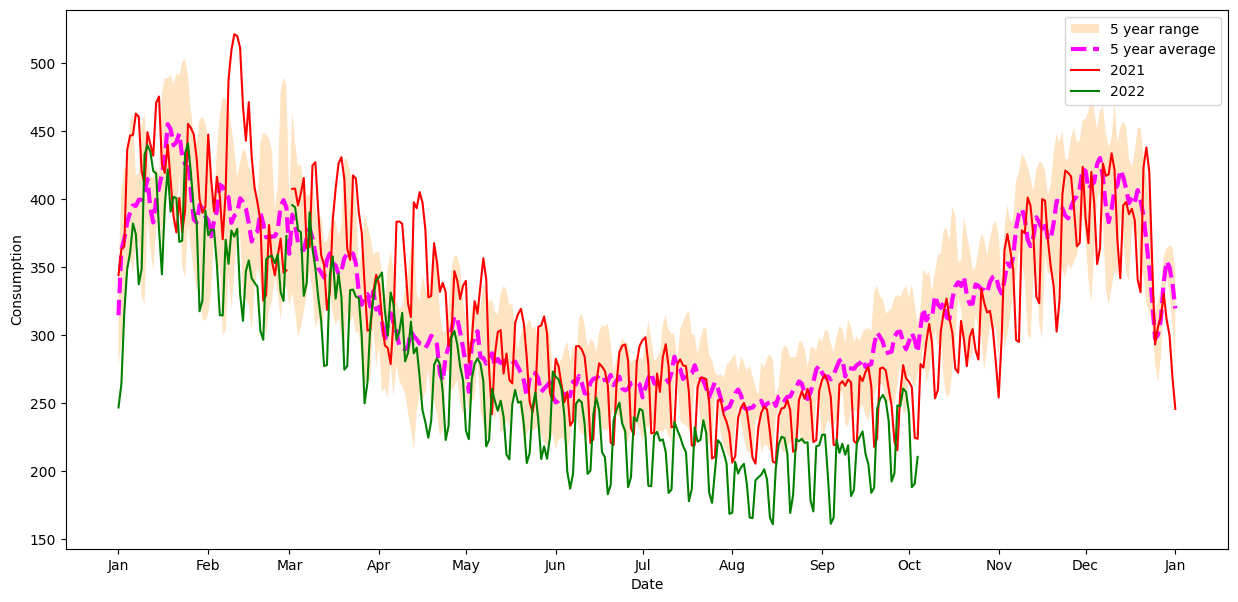

In [16]:
# Plot the 5 year range with average and 2021, 2022 line plots
fig, ax = plt.subplots(1, figsize=[15,7])

# Plotting 5-year range
ax.fill_between(df_5yr.index, df_5yr["Min"], df_5yr["Max"], label="5 year range", facecolor="bisque")
# Plotting 5-year average
ax.plot(df_5yr.index, df_5yr['Average'], label="5 year average", c="magenta", ls='dashed', lw=3)
# Plotting 2021 line
ax.plot(df2.index, df2[2021], label="2021", c="r")
# Plotting 2022 line
ax.plot(df2.index, df2[2022], label="2022", c="g")

# Adjust axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(loc = 'best')

# Axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Consumption')

plt.show()

- The 5 year average consumption shows that consumption increases from January reaching a maximum value at the end of the month and then falls until August before rising again once August starts. 
- It reaches a maximum at the end of November and then falls again in December. 
- This variation is consistent with seasonal variations where the temperatures are coolest in January thus prompting an increase in energy consumption and as temperature begins to fall from August onwards, the energy consumption increases again.
- However, it is seen that the energy consumption falls within the month of December which not only happens over the 5 years but also in 2021. This could be due to the fact that many people are away on holidays during the month of December which could cause the fall in energy consumption.
- A similar trend is observed in 2021.
- However, the consumption of 2022 is less compared to the 5 year average and 2021. This fall in 2022 could be due to the rise in cost of living prompting people to save on energy bills by decreasing consumption.